PCA

In [15]:
from sklearn.decomposition import PCA 

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

LogisticRegression without PCA
Accuracy without PCA :0.9161428571428571
Computation time without PCA : 62.45second

LogisticRegression with PCA
Accuracy with PCA: 0.9240714285714285
Computattion time with PCA: 48.03 second

Explained variance ratio by PCA : [0.05649659 0.04047592 0.03740178 0.02908364 0.02542915 0.02204539
 0.01915071 0.01744161 0.01529573 0.0140897  0.0135573  0.01199749
 0.01111292 0.01099421 0.01028974 0.01002521 0.00943952 0.00922392
 0.00896371 0.0087911  0.00832264 0.00806214 0.00767397 0.00750965
 0.007203   0.00700682 0.00689405 0.00666575 0.00635944 0.00622045
 0.00600366 0.00589203 0.00575092 0.00565152 0.00558759 0.00543369
 0.0053907  0.00518727 0.00516341 0.00495548 0.00485693 0.00482212
 0.00475194 0.00458036 0.00452239 0.00448172 0.00438707 0.00432938
 0.00427298 0.00421322 0.0041508  0.00410648 0.00403989 0.00393006
 0.00387445 0.0038012  0.00374208 0.00369493 0.00365534 0.0036361
 0.00358484 0.00354356 0.00350818 0.00350111 0.00349617 0.00347024
 0.003

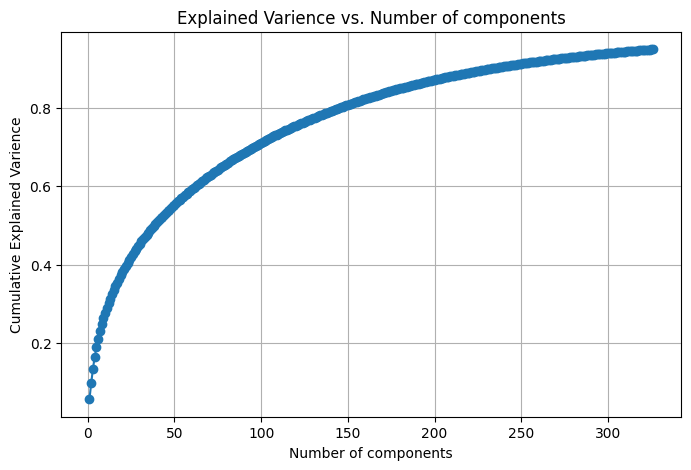

In [23]:
mnist = fetch_openml("mnist_784",version=1)

x = mnist['data']
y = mnist['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2)

# start_time = time.time()


print("LogisticRegression without PCA")

start_time = time.time()

log_reg = LogisticRegression(max_iter=1000,solver="lbfgs",random_state=42)
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

accuracy_no_pca = accuracy_score(y_test,y_pred)
print(f"Accuracy without PCA :{accuracy_no_pca}")

end_time = time.time()
time_no_pca = end_time-start_time
print(f"Computation time without PCA : {time_no_pca:.2f}second\n")

print("LogisticRegression with PCA")

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

start_time = time.time()

log_reg_pca = LogisticRegression(max_iter=1000, solver="lbfgs",random_state=42)
log_reg_pca.fit(X_train_pca,y_train)

y_pred_pca = log_reg_pca.predict(x_test_pca)

accuracy_with_pca = accuracy_score(y_test,y_pred_pca)
print(f"Accuracy with PCA: {accuracy_with_pca}")

end_time = time.time()
time_with_pca = end_time-start_time
print(f"Computattion time with PCA: {time_with_pca:.2f} second\n")

print(f"Explained variance ratio by PCA : {pca.explained_variance_ratio_}")

print(f"Number of components selected :{ pca.n_components}")

plt.figure(figsize=(8,5))
plt.plot(range(1,pca.n_components_+1),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Varience")
plt.title("Explained Varience vs. Number of components")
plt.grid(True)
plt.show()

 